In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [47]:
image_path = "../output_videos/sunsPlayer.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

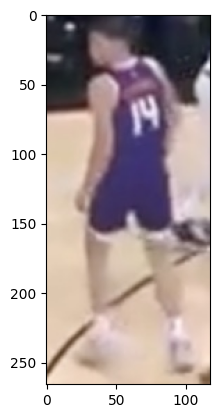

In [48]:
plt.imshow(image)
plt.show()

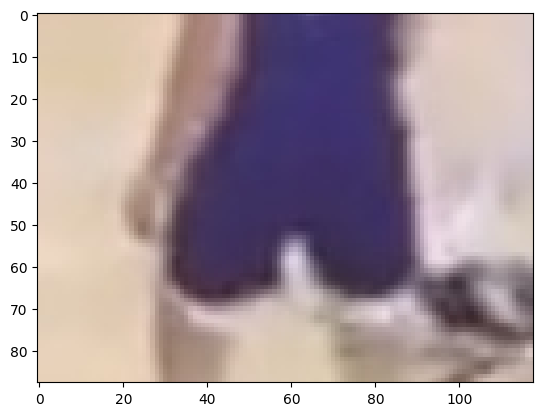

In [49]:
top_half_image=  image[0: int(image.shape[0]/2), :]
bottom_half_image = image[int(image.shape[0]/2):, :]
height, width, channels = image.shape
start_y = height // 3
end_y = 2 * (height // 3)

# Extract the middle part
middle_image = image[start_y:end_y, :]
plt.imshow(middle_image)
plt.show()

# Cluster the image into two clusters

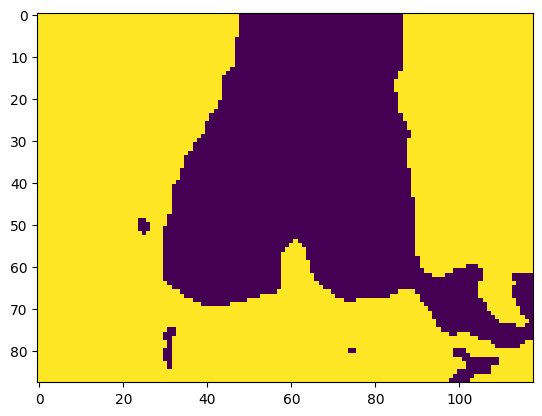

In [50]:
# Reshape the image into 2d array
image_2d = middle_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(middle_image.shape[0], middle_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [44]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [45]:
player_cluster = non_player_cluster - 1
print(player_cluster)

-1


In [46]:
kmeans.cluster_centers_[player_cluster]

array([127.69336384,  95.39130435, 119.08237986])